**Airline Passenger Satisfaction**

Author: Ozan GEÇKİN

In this project, Feature Engineering, Feature Selection and Classification processes were performed on the dataset containing the satisfaction surveys of an airline company.

The aim of the project is to estimate the satisfaction status. Anticipating this situation gives the airline a great help in improving its services.

In this project, Random Forest, Logistic Regression, XGB, Gaussian Navie Bayes(I implemented) as classicifation techniques

I made the accurancy account with roc_auc_score and also used other indicators. You can observe the accurancy difference between these 4 classification algorithms at the bottom of the project.

In [17]:
import numpy as np
import pandas as pd
!pip install plotly==4.8.2
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
from sklearn.metrics import f1_score,confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report,plot_roc_curve
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


**Description of the dataset attributes used in the project.**

*Gender*: Gender of the passengers (Female, Male)

*Customer Type*: The customer type (Loyal customer, disloyal customer)

*Age*: The actual age of the passengers

*Type of Travel*: Purpose of the flight of the passengers (Personal Travel, Business Travel)

*Class*: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

*Flight distance*: The flight distance of this journey

*Inflight wifi service*: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

*Departure/Arrival time convenient*: Satisfaction level of Departure/Arrival time convenient

*Ease of Online booking*: Satisfaction level of online booking

*Gate location*: Satisfaction level of Gate location

*Food and drink*: Satisfaction level of Food and drink

*Online boarding*: Satisfaction level of online boarding

*Seat comfort*: Satisfaction level of Seat comfort

*Inflight entertainment*: Satisfaction level of inflight entertainment

*On-board service*: Satisfaction level of On-board service

*Leg room service*: Satisfaction level of Leg room service

*Baggage handling*: Satisfaction level of baggage handling

*Check-in service*: Satisfaction level of Check-in service

*Inflight service*: Satisfaction level of inflight service

*Cleanliness*: Satisfaction level of Cleanliness

*Departure Delay in Minutes*: Minutes delayed when departure

*Arrival Delay in Minutes*: Minutes delayed when Arrival

*Satisfaction*: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [18]:
dftrain = pd.read_csv('/content/drive/MyDrive/dataminigproje/train.csv')
dftest = pd.read_csv("/content/drive/MyDrive/dataminigproje/test.csv")
dftrain.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


I'll start with removing the Unnamed and id column. Cause my guess is they don't matter


In [19]:
dftrain= dftrain.drop(["Unnamed: 0","id"],axis=1)
dftest = dftest.drop(["Unnamed: 0","id"],axis=1)

I'm merging the data because I'm going to do cleaning and parameter selection on the data.

In [20]:
df = dftrain.append(dftest)

In [21]:
fig = px.sunburst(df, path=['Type of Travel','Class', 'Customer Type'],color_continuous_scale='RdBu')
fig.show()

In [22]:
dftrain.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


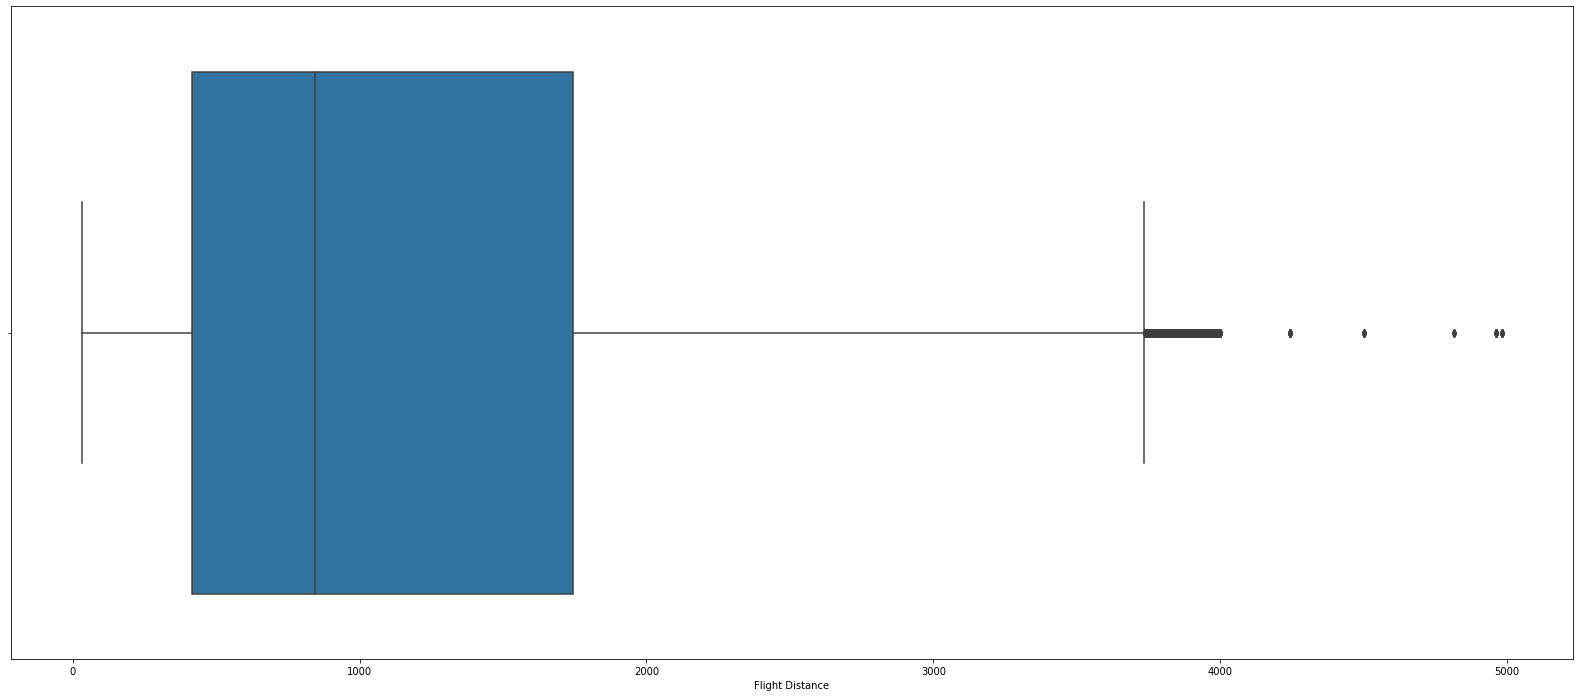

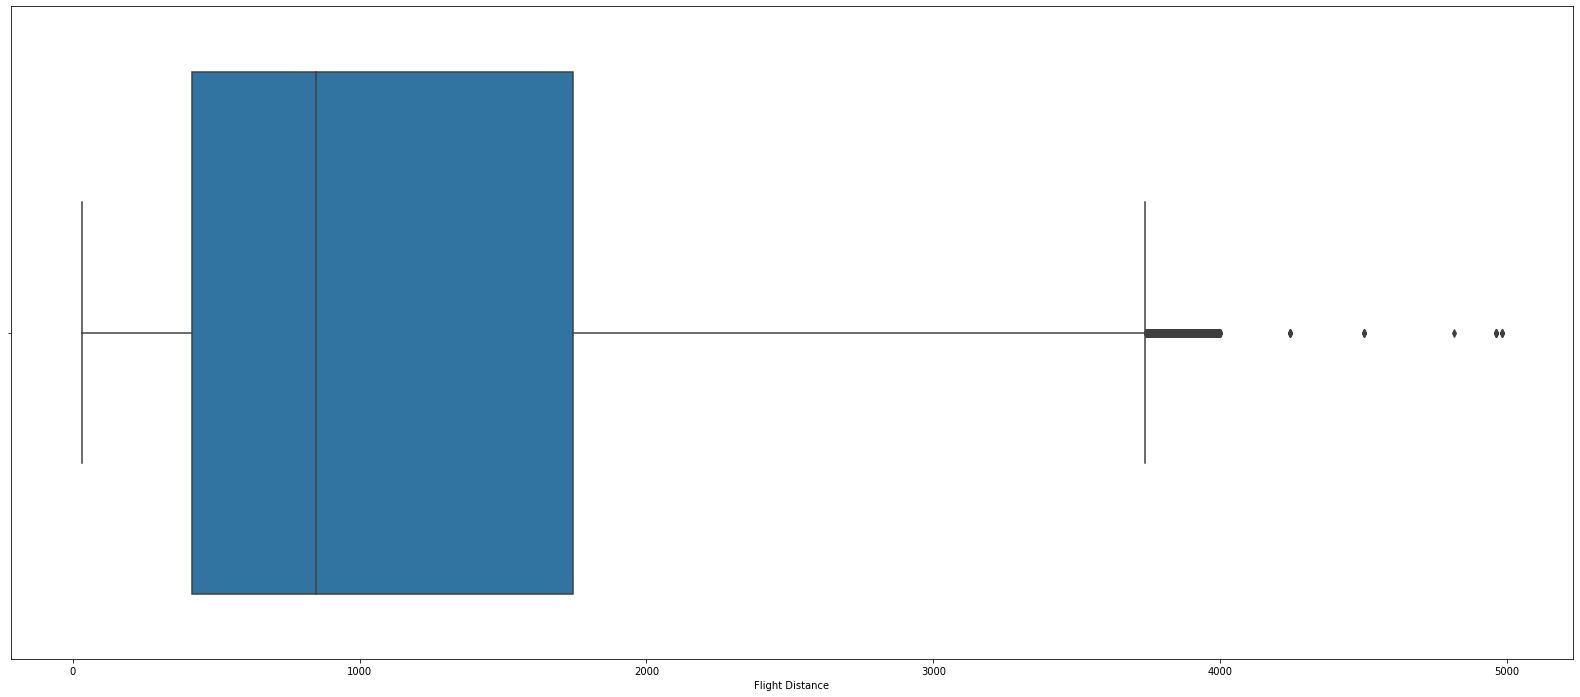

In [23]:
plt.figure(figsize=(28,12))
sns.boxplot(dftrain['Flight Distance'])
plt.show()
plt.figure(figsize=(28,12))
sns.boxplot(dftest['Flight Distance'])
plt.show()

In [24]:
# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
   

removeOutliers(dftrain, "Flight Distance")
dftrain=filtered_data

removeOutliers(dftest, "Flight Distance")
dftest=filtered_data

dftrain 

IQR value for column Flight Distance is: 1329.0
IQR value for column Flight Distance is: 1330.0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


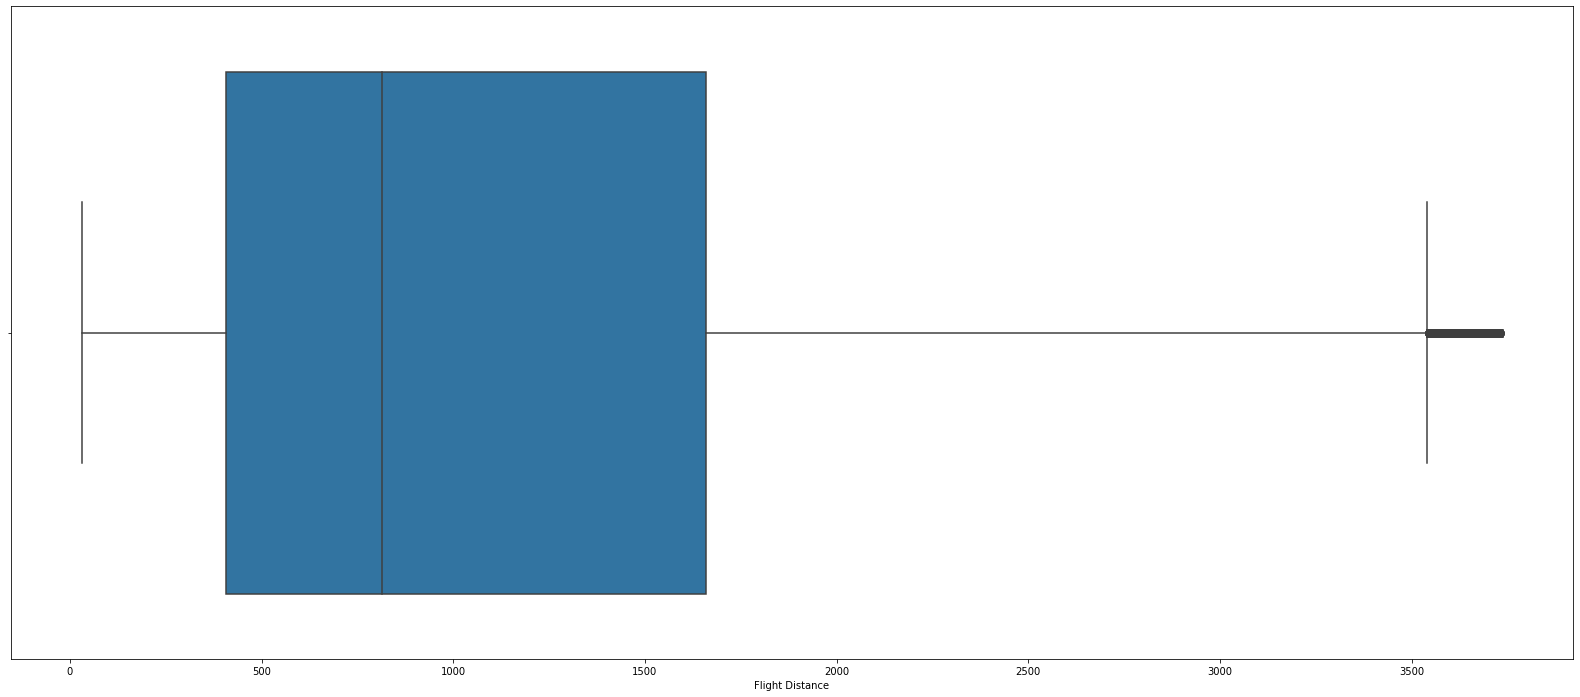

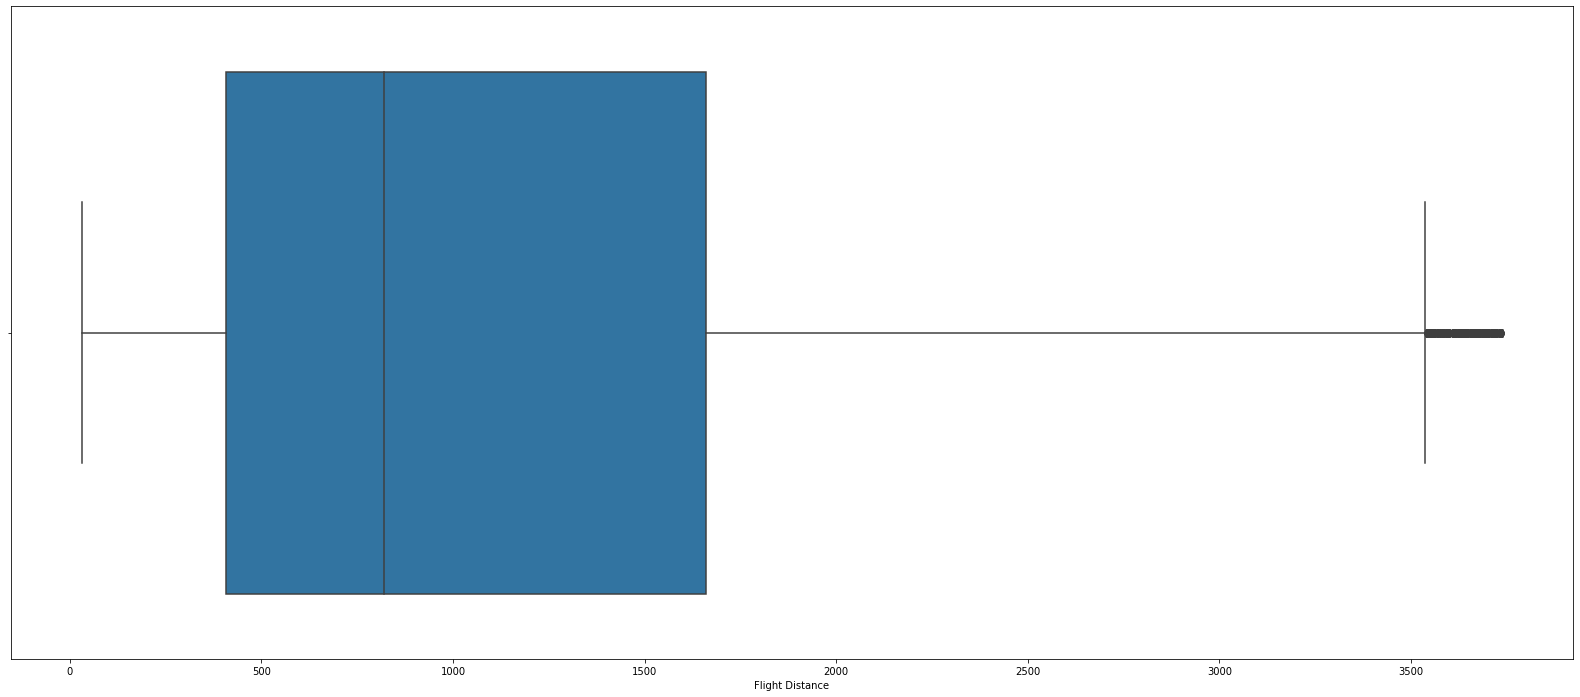

In [25]:
plt.figure(figsize=(28,12))
sns.boxplot(dftrain['Flight Distance'])
plt.figure(figsize=(28,12))
sns.boxplot(dftest['Flight Distance'])

İmputation

In [26]:
print(dftrain.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             306
satisfaction                           0
dtype: int64


In [27]:
print(dftest.isnull().sum())

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             79
satisfaction                          0
dtype: int64


In [28]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

Imputasyon, (Encoding),(Missing Values)

Based on the training data above, there are a few things we need to do to prepare the data for use in a model. There are several categorical variables that need to be coded, including our target variable 'Satisfaction'.

In [30]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1

def process_data(df):
    df['Gender']=df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    return df

train=process_data(dftrain)
test=process_data(dftest)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


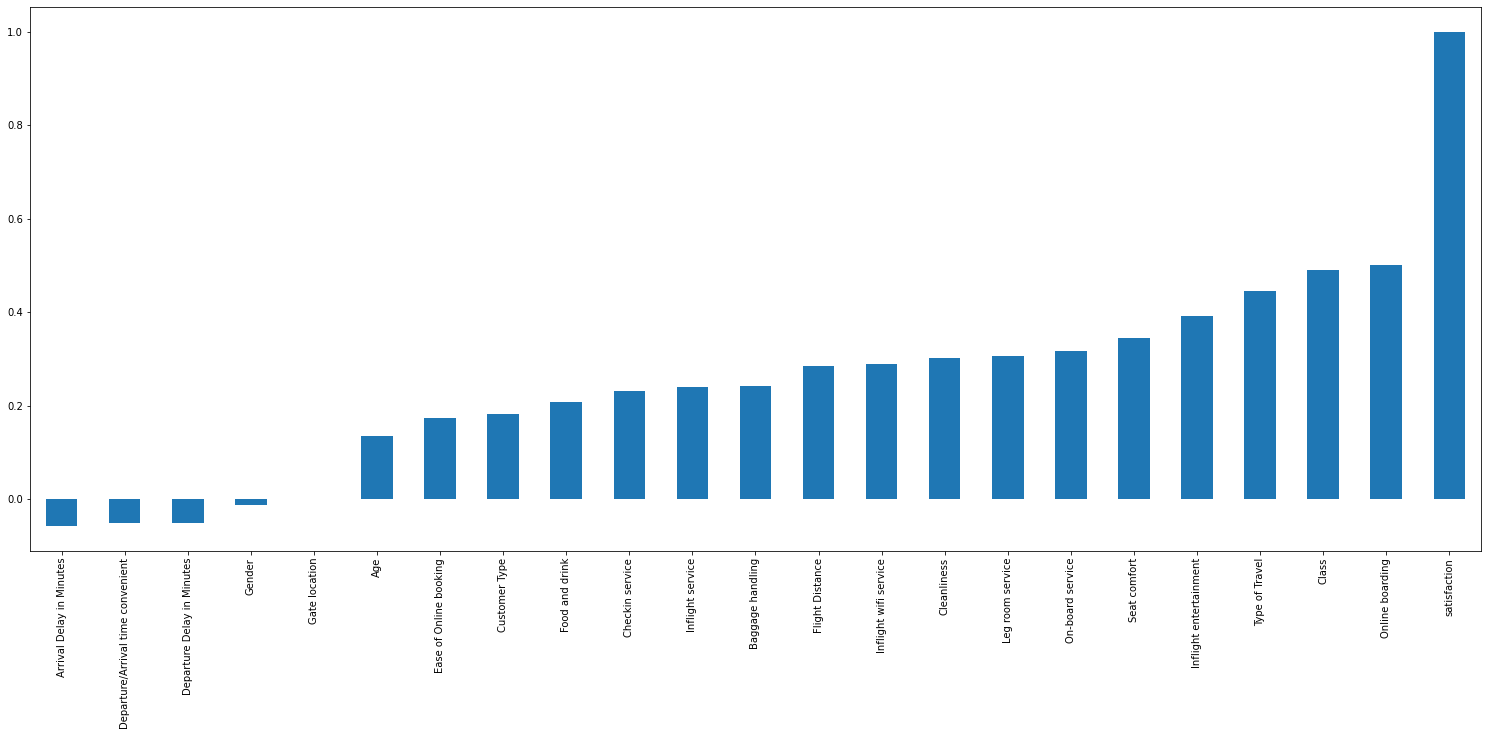

In [31]:
plt.figure(figsize = (26,10))
dftrain.corr(method='pearson')['satisfaction'].sort_values().plot(kind='bar')

As you can see, the correlation value of the first 5 values is low, I delete them.

In [32]:
dftrain=dftrain.drop(columns=["Arrival Delay in Minutes","Departure/Arrival time convenient","Departure Delay in Minutes","Gender","Gate location"],axis=1)
dftest=dftest.drop(columns=["Arrival Delay in Minutes","Departure/Arrival time convenient","Departure Delay in Minutes","Gender","Gate location"],axis=1)

Normalization

In [33]:
X_train=dftrain.drop("satisfaction",axis=1)
X_test=dftest.drop("satisfaction",axis=1)
target = ['satisfaction']
y_train = dftrain[target].to_numpy()
y_test = dftest[target].to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


I am doing a correlation matrix, I learn more about data, I learn the relationship between parameters


Text(0.5, 1.0, 'Params')

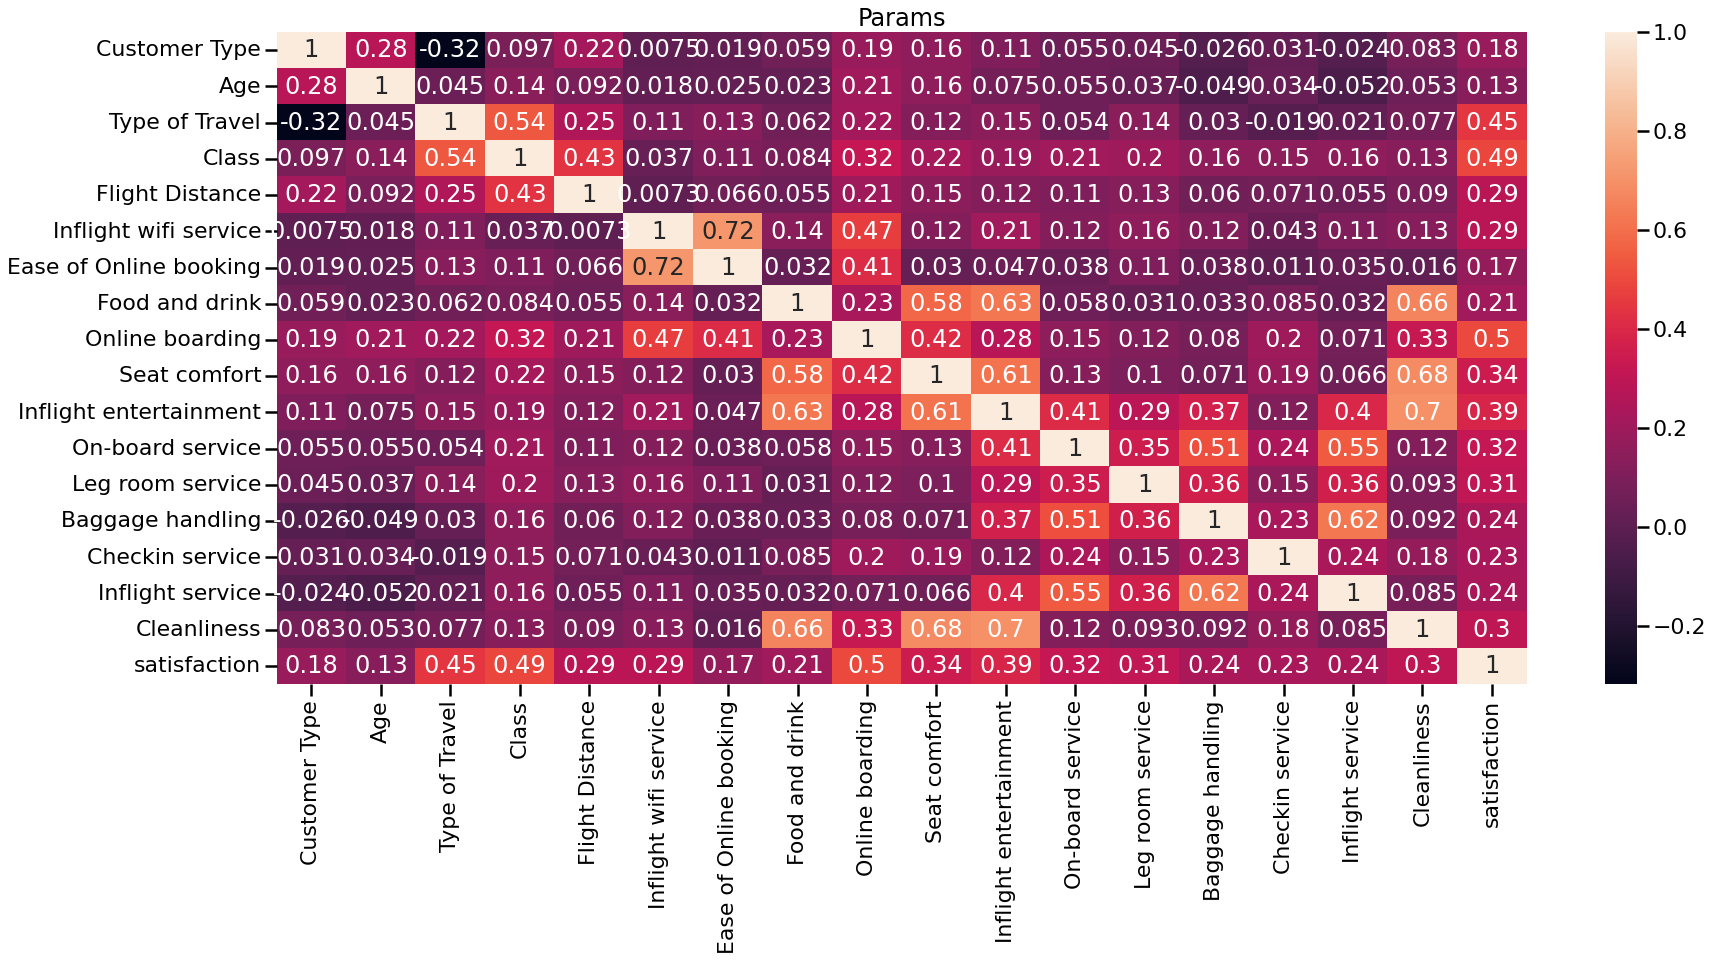

In [34]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(dftrain.corr(), annot = True).set_title('Params')

Scaler process complete. Let's take a look at a correlation heatmap to see which attributes correlate well with customer satisfaction.

**Best features** - Online Booking, Class, and Type of Travel

**Worst features** - Age, Customer Type, and Ease of Online booking


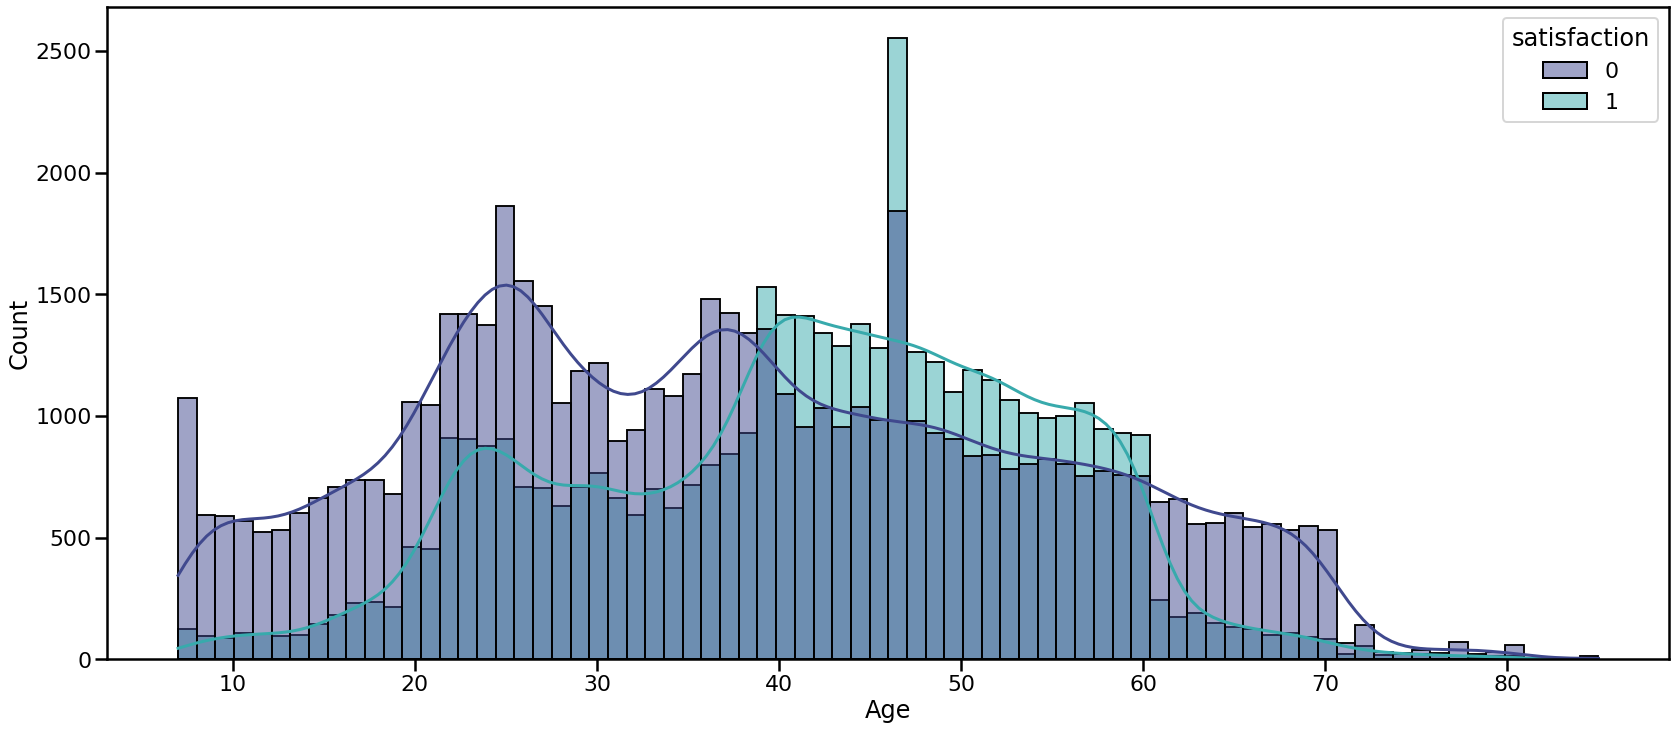

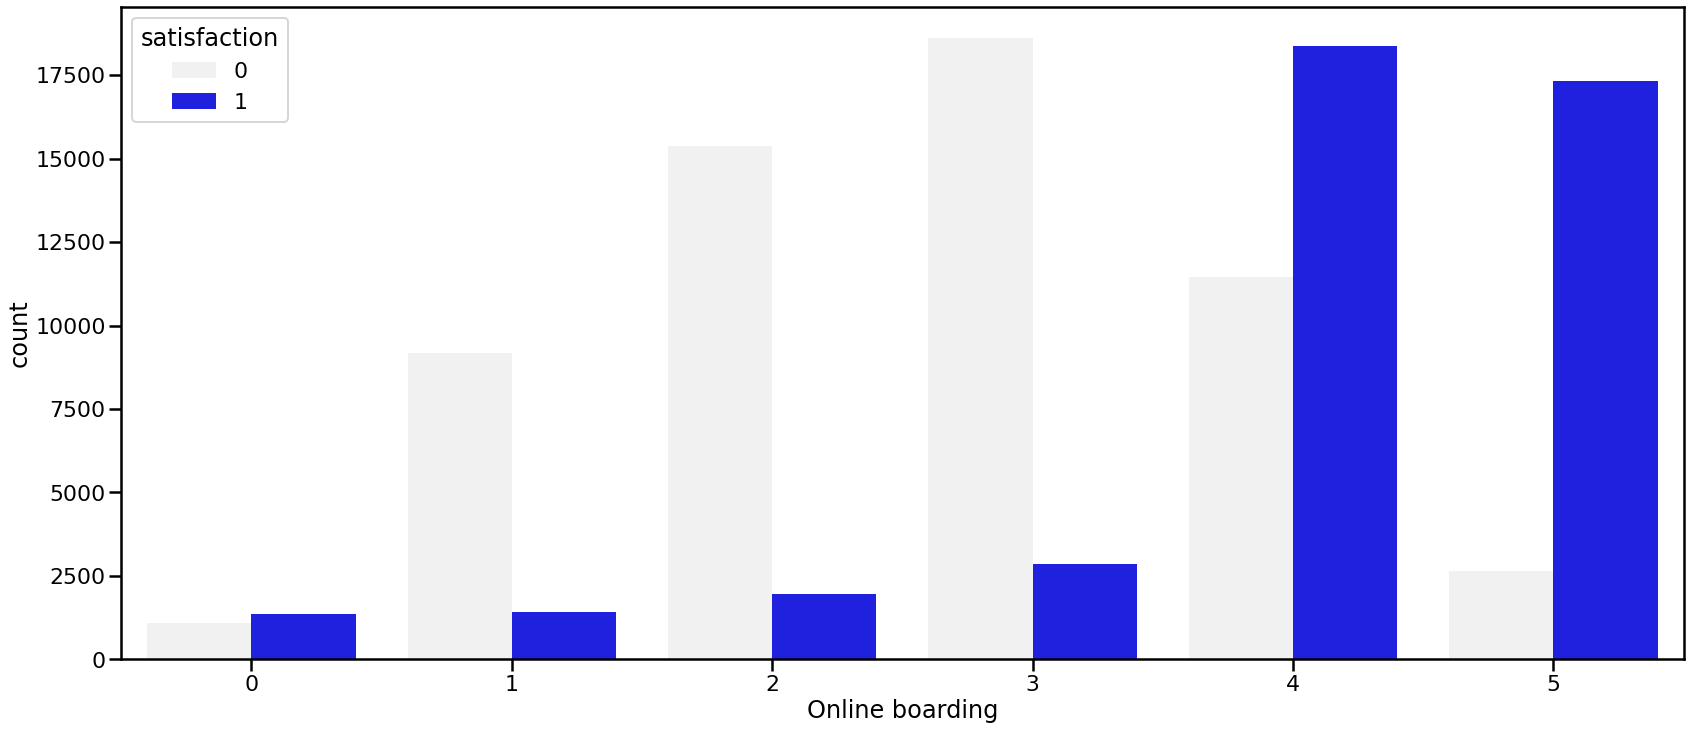

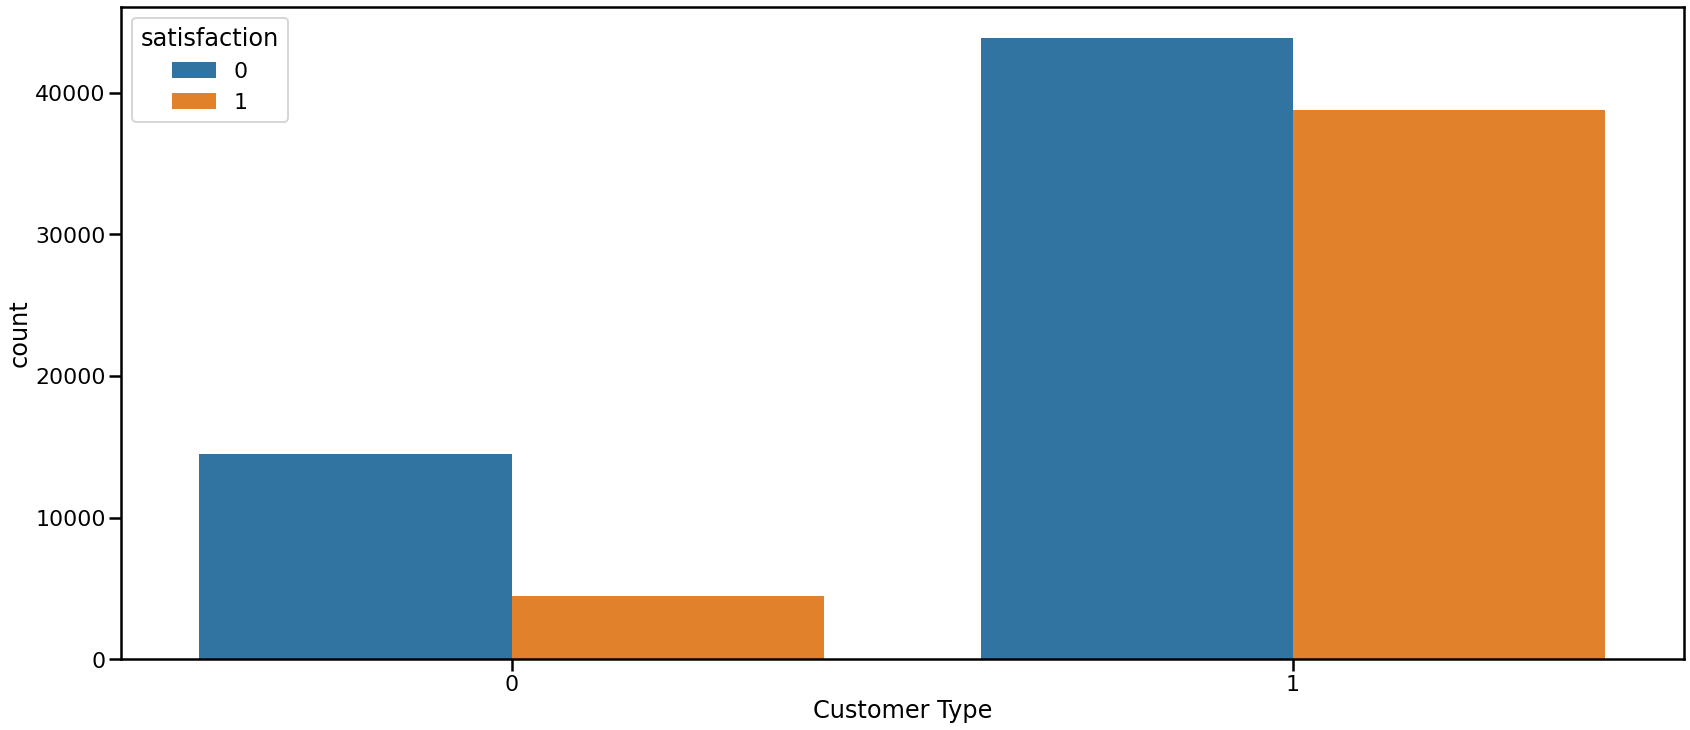

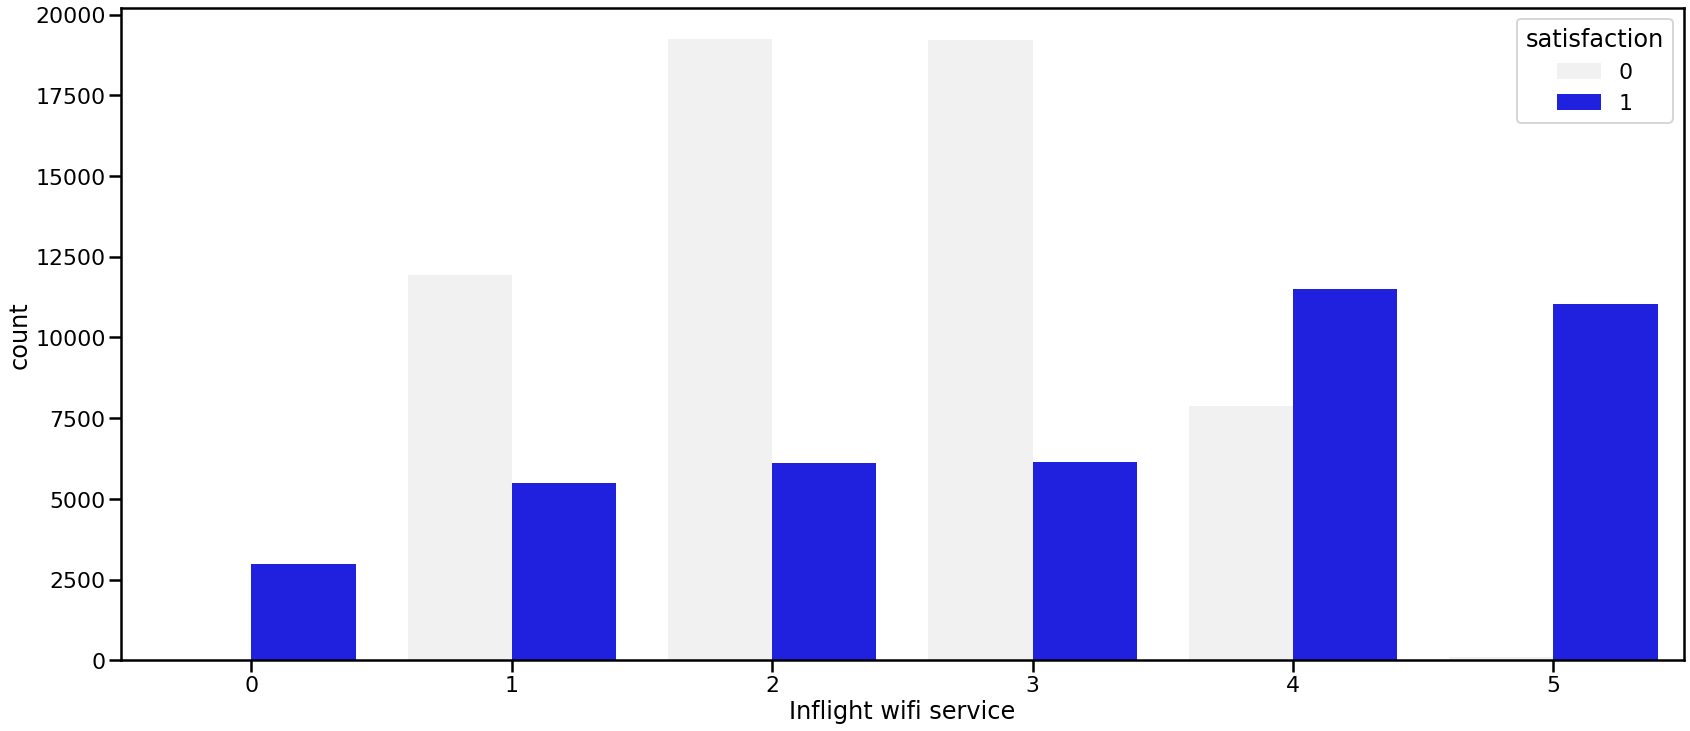

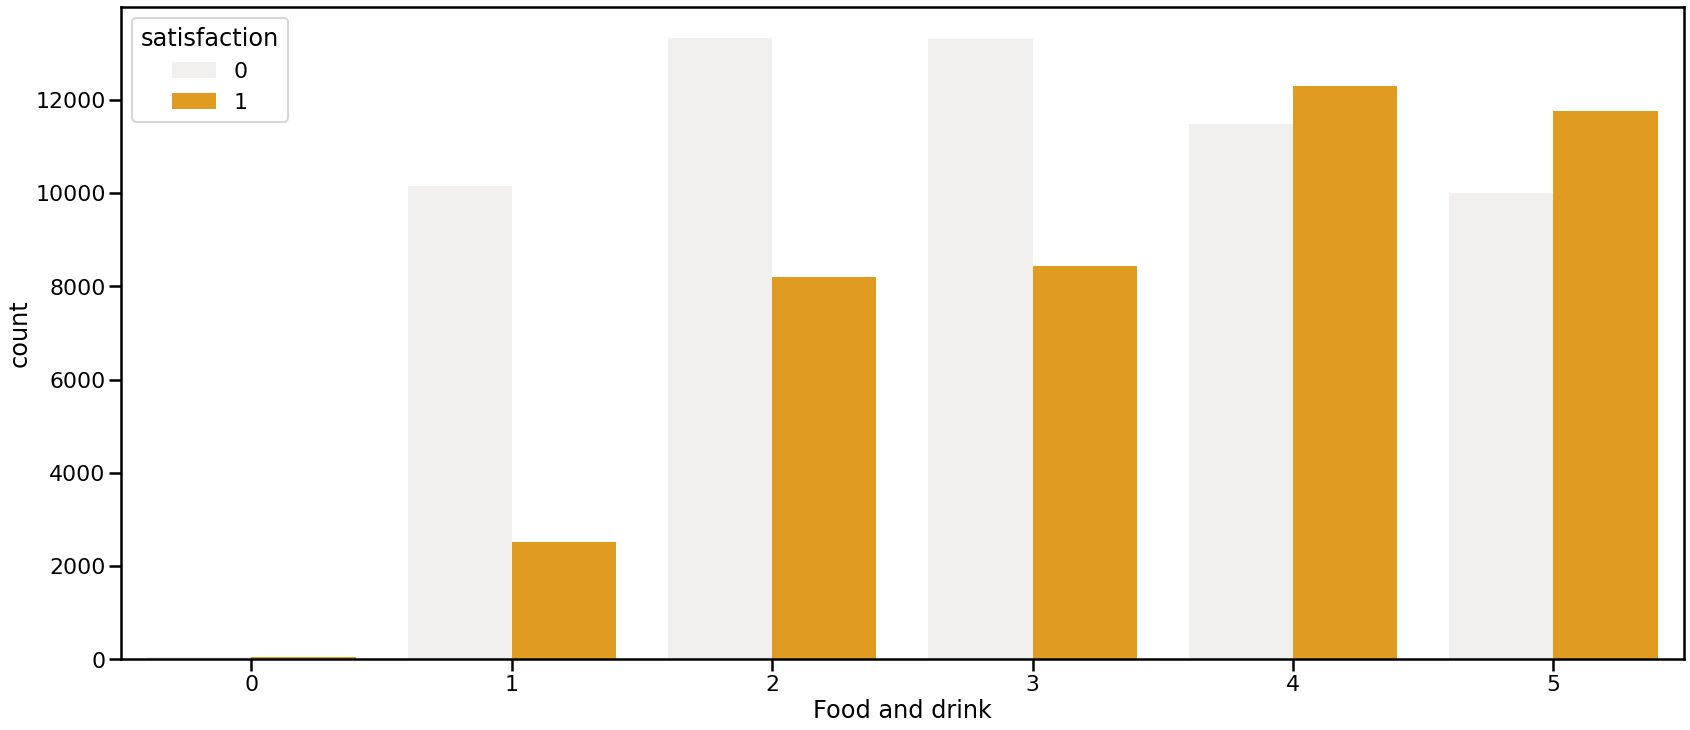

In [35]:
plt.figure(figsize=(28,12))
sns.histplot(x='Age',hue="satisfaction",data=train,kde=True,palette="mako")
plt.figure(figsize=(28,12))
sns.countplot(x='Online boarding',hue="satisfaction",data=train,color="blue")
plt.figure(figsize=(28,12))
sns.countplot(x='Customer Type',hue="satisfaction",data=train)
plt.figure(figsize=(28,12))
sns.countplot(x='Inflight wifi service',hue="satisfaction",data=train,color="blue")
plt.figure(figsize=(28,12))
sns.countplot(x='Food and drink',hue="satisfaction",data=train,color="orange")




We will try a few different models to see which one is the best choice for our problem.

Below I have created a small function that will train, predict and evaluate all of our models.

We will evaluate the performance of our models with the ROC_AUC metric, Confusion Matrix, F1 Score (F1 Score).
These metrics are good for classifying a relatively balanced dataset for our purpose. We will also look at the confusion matrix of our model to best understand how our model mischaracterizes the predictions.

In [36]:
def run_and_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc


**Navie Bayes Implementation**

In [74]:
class NaiveBayes():

  def fit(self, X_train, y_train):
    self.X_train,self.y_train = X_train, y_train
    self.classes = np.unique(y_train)
    self.param=[]
    for i in range(2):
      self.param.append([])
      for row in X_train:
        param={"mean":row.mean(),"var":row.var()}
        self.param[i].append(param)

  def callikehood(self, mean, var, x):
    eps = 1e-4 
    coeff = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * var + eps)))
    return coeff * exponent

  def calPrior(self, c):
    fr = np.mean(self.y_train == c)
    return fr

  def classify(self,model):
      posts = []
      for i, c in enumerate(self.classes):
          post = self.calPrior(c)
          for attributeVal, params in zip(model, self.param[i]):
              possible = self.callikehood(params["mean"], params["var"], attributeVal)
              post *= possible
          posts.append(post)
      return self.classes[np.argmax(posts)]

  def predict(self, X_test):
    y_pred = [self.classify(model) for model in X_test]
    return y_pred

clf= NaiveBayes()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
roc_auc_nb = roc_auc_score(y_test, y_pred)
print("ROC_AUC = {}".format(roc_auc_nb))
print(classification_report(y_test,y_pred,digits=5))


ROC_AUC = 0.5
              precision    recall  f1-score   support

           0    0.56844   1.00000   0.72484     14432
           1    0.00000   0.00000   0.00000     10957

    accuracy                        0.56844     25389
   macro avg    0.28422   0.50000   0.36242     25389
weighted avg    0.32312   0.56844   0.41203     25389



**Random Forest**

ROC_AUC = 0.9593881257908613
              precision    recall  f1-score   support

           0    0.95501   0.97956   0.96713     14432
           1    0.97213   0.93922   0.95539     10957

    accuracy                        0.96215     25389
   macro avg    0.96357   0.95939   0.96126     25389
weighted avg    0.96240   0.96215   0.96206     25389



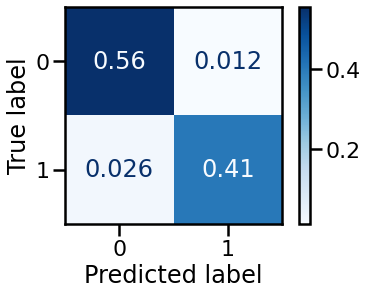

In [38]:
params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_and_model(model_rf, X_train, y_train, X_test, y_test)

**Logistic Regression**

ROC_AUC = 0.8651701606127319
              precision    recall  f1-score   support

           0    0.87327   0.90292   0.88785     14432
           1    0.86615   0.82742   0.84634     10957

    accuracy                        0.87034     25389
   macro avg    0.86971   0.86517   0.86710     25389
weighted avg    0.87020   0.87034   0.86994     25389



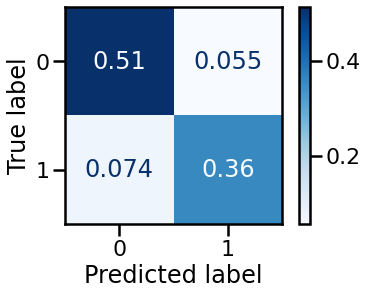

In [39]:
model_lr = LogisticRegression(max_iter=10000)
model_lr, roc_auc_lr = run_and_model(model_lr, X_train, y_train, X_test, y_test)

ROC_AUC = 0.9351128400639711
              precision    recall  f1-score   support

           0    0.93426   0.95912   0.94653     14432
           1    0.94420   0.91111   0.92736     10957

    accuracy                        0.93840     25389
   macro avg    0.93923   0.93511   0.93694     25389
weighted avg    0.93855   0.93840   0.93825     25389



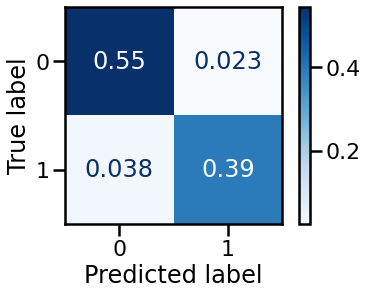

In [40]:
model_xgb= xgb.XGBClassifier()
model_xgb,roc_auc_xgb=run_and_model(model_xgb, X_train, y_train, X_test, y_test)

In [41]:
aucScore = [roc_auc_nb, roc_auc_rf, roc_auc_lr, roc_auc_xgb]
modelScores = pd.DataFrame(aucScore, index=['Navie Bayes','Random Forest','Logistic Regression','XGBoost'],columns=['ACC'])
modelScores.head()

,ACC
Navie Bayes,0.500000
Random Forest,0.959388
Logistic Regression,0.865170
XGBoost,0.935113
